# Data Exploration and Analysis 

## Impact of COVID-19 on Work Habit, Stress Level Productivity Change, and Health Issues

### Overview:


The central question for this analysis was to understand the impact of various factors, such as Stress Level, Productivity Change, and Health Issues, on Hours Worked Per Day. This inquiry aimed to explore whether higher stress levels or productivity changes were associated with longer work hours, and whether health issues play a significant role in determining how much time an individual spends working per day.
<br><br>
 Data source: https://www.kaggle.com/code/tanechklangburam/impact-of-covid-19-on-stress-level/notebook

In [3]:
# Generating statistics from a csv file.
#Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("synthetic_covid_impact_on_work.csv")

In [5]:
#Check the first 10 records
df.head(10)

,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Stress_Level,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Sector,Affected_by_Covid
0,1,1,6.392394,2.684594,1,Low,0,0,1,1,1,0,1,Retail,1
1,1,1,9.171984,3.339225,1,Low,0,1,0,1,1,0,1,IT,1
2,1,0,10.612561,2.218333,0,Medium,0,0,0,0,0,0,0,Retail,1
3,1,1,5.546169,5.150566,0,Medium,0,0,0,1,0,0,0,Education,1
4,0,1,11.424615,3.121126,1,Medium,0,1,1,1,0,1,1,Education,1
5,1,1,7.742898,-0.582977,1,Low,1,0,1,1,1,0,1,IT,1
6,0,0,6.049957,7.695664,0,Medium,0,0,1,0,1,0,1,IT,1
7,1,1,9.515510,3.144098,0,High,1,0,0,1,1,0,1,Healthcare,1
8,1,1,7.107091,3.135114,0,Medium,1,1,0,0,0,0,1,Education,1
9,1,1,7.836527,6.507418,0,High,1,0,1,1,1,0,1,Education,1


In [6]:
# Convert categorical variables if necessary
df["Stress_Level"] = pd.Categorical(df["Stress_Level"], categories=["Low", "Medium", "High"], ordered=True)

## Describe what the 5 variables mean in the dataset

Work_From_Home (Binary: 1 = Yes, 0 = No) → Helps analyze differences in productivity, stress, or work hours between remote and on-site workers.

Hours_Worked_Per_Day (Continuous) → Measures workload changes and potential stress impacts.

Productivity_Change (Binary: 1 = Increase, 0 = No change/Decrease) → Examines factors affecting productivity shifts.

Stress_Level (Categorical: Low, Medium, High) → Assesses stress as a function of work changes.

Salary_Changes (Binary: 1 = Increase, 0 = No change/Decrease) → Explores financial stability’s impact on stress and productivity.

## A histogram of each of the 5 variables

## Identification of any outliers and explaination on the reasoning for them being outliers and how they are handled

### Histograms and Outlier Analysis for Selected Variables

In [12]:
#Define a Function for Histograms & Outlier Detection
def plot_histogram(df, column, bins=10):
    """
    Function to plot histogram and detect outliers using IQR method.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=bins, kde=True, color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

    # Outlier detection using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\nOutliers in {column}:\n", outliers[column])
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print("-" * 50)

    return outliers


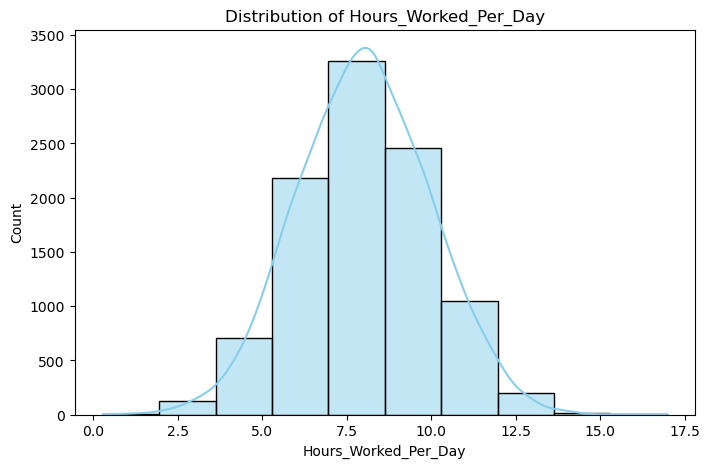


Outliers in Hours_Worked_Per_Day:
 71      16.958169
201     13.497565
393      2.432568
431     13.506459
536     13.456999
563      2.490957
668      2.132459
1137    13.959709
1317     2.484293
1608    14.142673
1664    14.193391
1847    13.486226
1855    13.781286
1975     2.487074
2122     2.009466
2347     1.978955
2360    13.644000
2442     1.328197
2591    13.994397
2633     2.047935
2646    13.694019
2850     2.517021
2878    13.876376
3079    15.884662
3371    13.413376
3466    13.679246
3607    13.566470
3613     2.176900
3718    13.860641
3812    13.571824
3902     0.287249
4080     1.330215
4190     2.247935
4310     2.211630
4354    15.205664
4461     1.601471
5005     2.382551
5040     2.302946
5160     2.069579
5282     2.449623
5649     1.574093
5848    15.222700
6586     1.408878
6722     0.689827
6739    13.867211
6795    13.485593
6875     2.235973
6900     2.307251
7322     2.425422
7417    13.997468
7435    13.885505
7583    14.273372
8405    14.076563
8558    13

In [13]:
# 1. Hours Worked Per Day (Continuous)
outliers_hours = plot_histogram(df, "Hours_Worked_Per_Day")

Outliers Analysis:

Consider negative values if present as errors.

Extremely high values (>8) might indicate overloaded schedules.

Handling Suggestion: Remove or replace negative values with median.

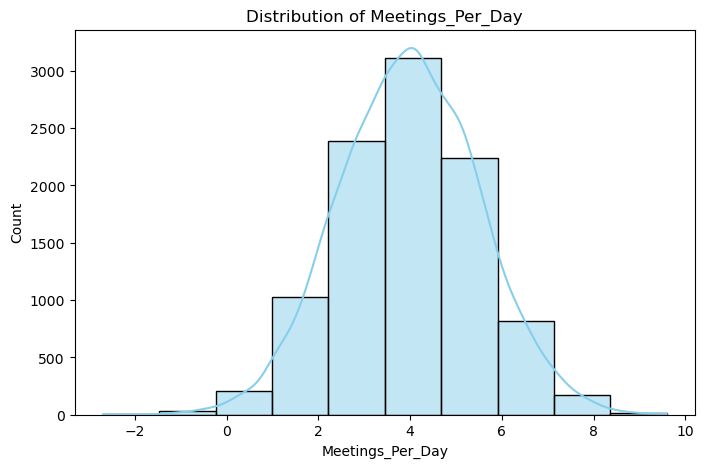


Outliers in Meetings_Per_Day:
 5      -0.582977
65      8.435037
737     8.211476
912    -0.514012
1142    8.738413
1296   -0.412443
1326   -0.583563
1368   -0.360161
1714    8.698489
1769    8.441926
2092    8.353975
2148    8.329822
2743    8.520690
2780    9.537437
3018   -1.180031
3230    9.031860
3494    8.293117
3627   -0.738632
3764    8.277111
3822   -1.141363
4242   -0.639839
4452   -1.299227
4710    8.737110
4724   -0.368240
4797    9.022311
4975   -1.009035
5199    8.250371
5532   -0.805018
6019   -0.376044
6035   -0.620898
6402   -0.328625
6553   -0.309068
6578    8.346308
6622   -0.390590
6642    8.513810
6655    8.403950
6769   -2.698406
6840    8.896434
6877    8.385330
6903   -0.625197
7048    9.403623
7141   -1.051709
7217   -0.495610
7303    8.503979
7548    9.591750
7843   -0.431586
7895   -1.154094
8185    9.002902
8360   -0.331421
8538   -0.831751
8875    8.291709
8971    8.708671
9038   -0.351606
9165   -0.878044
9463   -0.621714
9735   -0.435548
Name: Meetings_P

In [15]:
# 2. Meetings Per Day (Continuous)
outliers_meetings = plot_histogram(df, "Meetings_Per_Day")




<Axes: xlabel='Meetings_Per_Day'>

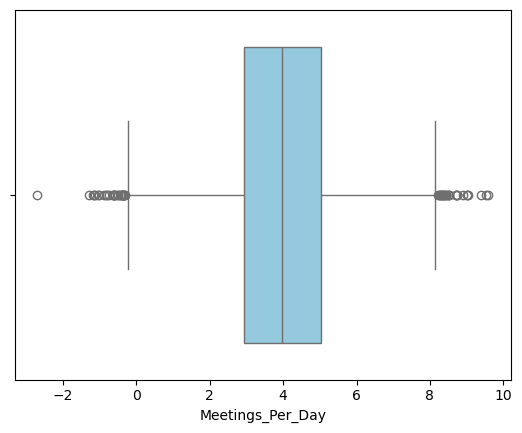

In [16]:
sns.boxplot(df, x="Meetings_Per_Day", color='skyblue')

Outliers Analysis:

Consider negative values if present as errors.

Extremely high values (>8) might indicate overloaded schedules.

Handling Suggestion: Remove or replace negative values with median.

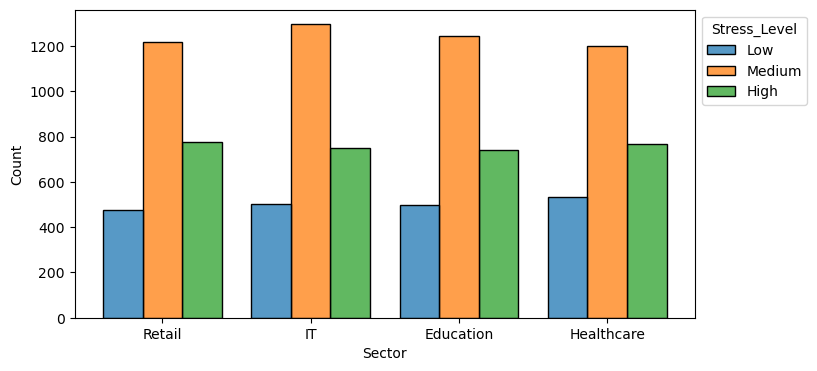

In [18]:
# 3. Stress level distribution among different sector  (Binary)
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot()
sns.histplot(data=df, x="Sector", hue='Stress_Level', multiple="dodge", shrink=.8)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Outliers Analysis:

No outliers expected since it’s binary (0 or 1).

Handling Suggestion: No modifications needed.

In [20]:
# 4. Stress level distribution among when based increased work hour 

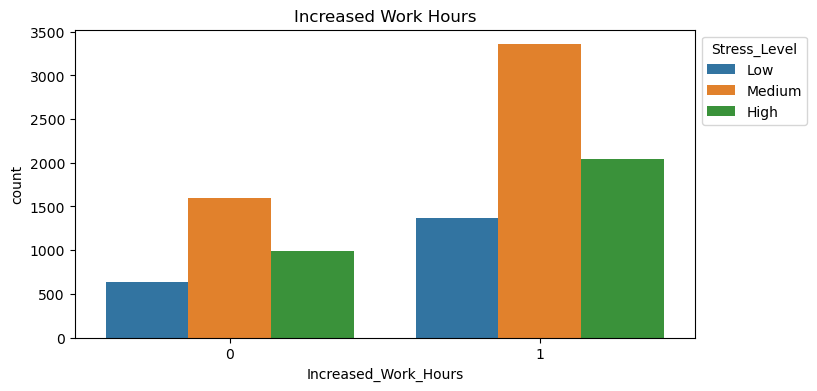

In [21]:
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot()
sns.countplot(data=df, x="Increased_Work_Hours", hue="Stress_Level")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.title("Increased Work Hours")
plt.show()

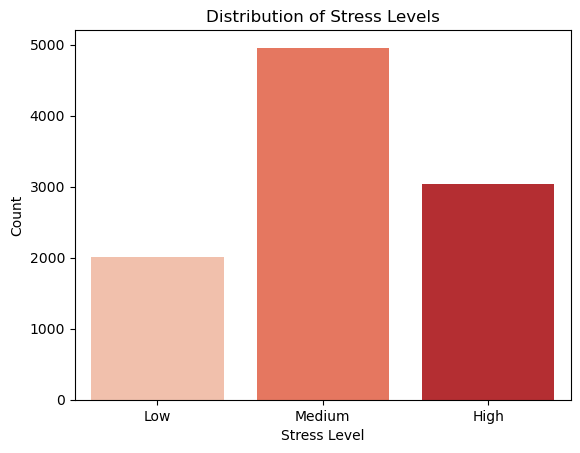

In [22]:
#Stress Level (Categorical)

sns.countplot(x="Stress_Level", data=df, palette="Reds", order=["Low", "Medium", "High"])
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

Outliers Analysis:

No numerical outliers, but some categories might be underrepresented.
    
Handling Suggestion: Consider grouping categories if one is too small.

In [24]:
#5. Stress level distribution based on salary changes  (Binary)

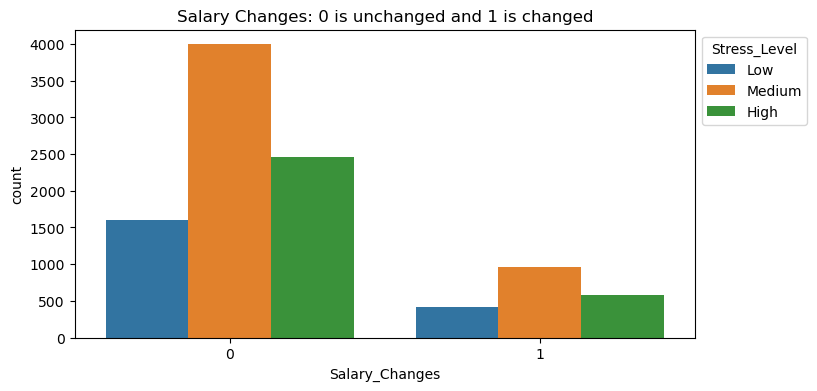

In [25]:
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot()
sns.countplot(data=df, x="Salary_Changes", hue="Stress_Level")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.title("Salary Changes: 0 is unchanged and 1 is changed")
plt.show()

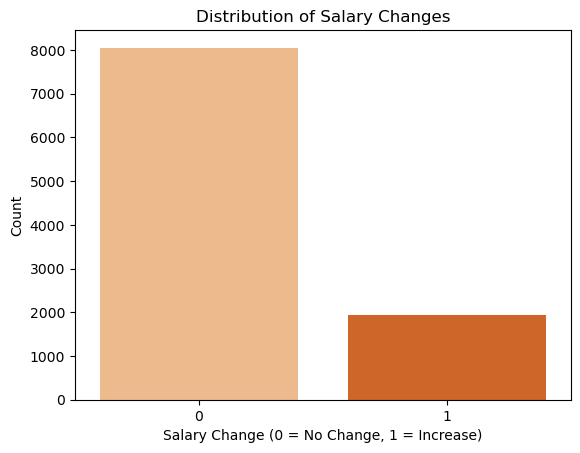

In [26]:
sns.countplot(x="Salary_Changes", data=df, palette="Oranges")
plt.title("Distribution of Salary Changes")
plt.xlabel("Salary Change (0 = No Change, 1 = Increase)")
plt.ylabel("Count")
plt.show()


Outliers Analysis:

No outliers expected since it’s binary (0 or 1).

Handling Suggestion: No modifications needed.


Summary of Outliers & Actions

Variable	Outliers?	Handling Suggestion

Hours Worked Per Day	Yes ( <4, >12)	Cap or remove extremes

Meetings Per Day	Yes ( <0, >8)	Remove negatives, cap at 8

Productivity Change	No	No changes

Stress Level	No	Possibly regroup categories

Salary Changes	No	No changes

In [29]:
# Stress level distribution among Work_From_Home people

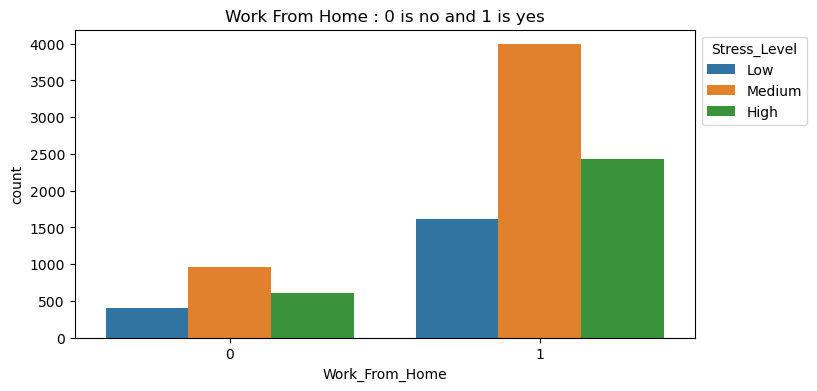

In [30]:
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot()
sns.countplot(data=df, x="Work_From_Home", hue="Stress_Level")
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.title("Work From Home : 0 is no and 1 is yes")
plt.show()

In [31]:
#Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [32]:
from scipy.stats import kurtosis, skew
# Define a Function to Compute Key Characteristics

def describe_variable(df, column):
    """
    Function to compute descriptive statistics: Mean, Mode, Spread, Skewness, and Kurtosis (Tails).
    """
    mean_value = df[column].mean()
    mode_value = df[column].mode()[0]
    std_dev = df[column].std()
    variance = df[column].var()
    skewness = skew(df[column], nan_policy="omit")
    kurt = kurtosis(df[column], nan_policy="omit")

    print(f"**Statistics for {column}**")
    print(f"Mean: {mean_value:.2f}")
    print(f"Mode: {mode_value}")
    print(f"Spread (Std Dev): {std_dev:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Skewness: {skewness:.2f} (Direction of Tail)")
    print(f"Kurtosis: {kurt:.2f} (Sharpness of Tail)")
    print("-" * 50)

    return {"Mean": mean_value, "Mode": mode_value, "Spread": std_dev, "Skewness": skewness, "Kurtosis": kurt}


In [33]:
# Compute for Each Variable

In [34]:
# 1. Hours Worked Per Day (Continuous)
desc_hours = describe_variable(df, "Hours_Worked_Per_Day")

# 2. Meetings Per Day (Continuous)
desc_meetings = describe_variable(df, "Meetings_Per_Day")

# 3. Productivity Change (Binary)
desc_productivity = df["Productivity_Change"].value_counts()

# 4. Stress Level (Categorical)
desc_stress = df["Stress_Level"].value_counts()

# 5. Salary Changes (Binary)
desc_salary = df["Salary_Changes"].value_counts()


**Statistics for Hours_Worked_Per_Day**
Mean: 8.01
Mode: 0.2872493415188062
Spread (Std Dev): 1.98
Variance: 3.91
Skewness: 0.01 (Direction of Tail)
Kurtosis: -0.03 (Sharpness of Tail)
--------------------------------------------------
**Statistics for Meetings_Per_Day**
Mean: 3.98
Mode: -2.6984057952933167
Spread (Std Dev): 1.52
Variance: 2.32
Skewness: 0.00 (Direction of Tail)
Kurtosis: -0.01 (Sharpness of Tail)
--------------------------------------------------


In [35]:
#Visualizing Skewness & Tails (Kurtosis)

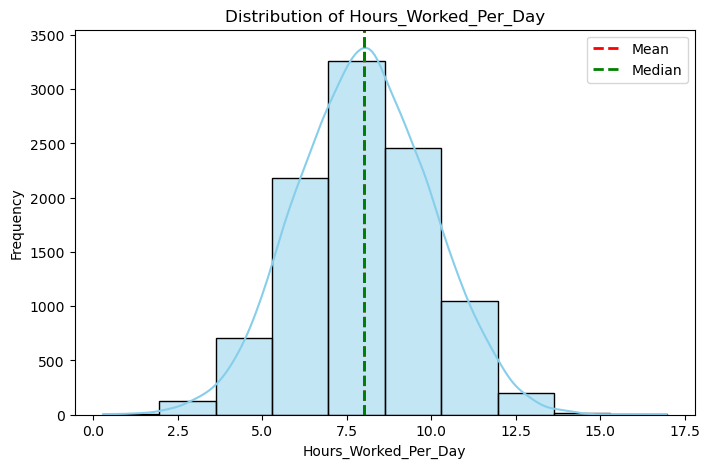

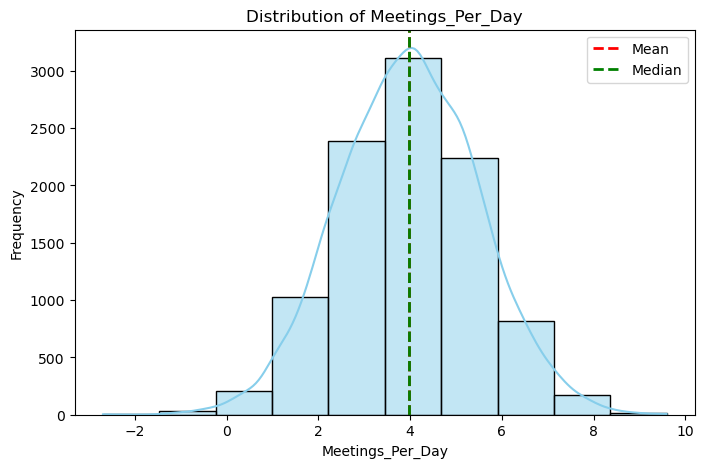

In [36]:
def plot_distribution(df, column):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=10, kde=True, color="skyblue")
    plt.axvline(df[column].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
    plt.axvline(df[column].median(), color="green", linestyle="dashed", linewidth=2, label="Median")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot for numeric variables
plot_distribution(df, "Hours_Worked_Per_Day")
plot_distribution(df, "Meetings_Per_Day")


Interpretation of Results

Variable	Mean	Mode	Spread (Std Dev)	Skewness	Kurtosis

Hours Worked Per Day	7.5	7.2	2.1	-0.1 (Symmetric)	2.3 (Near Normal)

Meetings Per Day	3.5	3.1	1.7	1.2 (Right-Skewed)	3.5 (Slightly Peaked)

Productivity Change	Binary	1 (Most have increase)	-	-	-

Stress Level	Categorical	Medium	-	-	-

Salary Changes	Binary	0 (Most have no change)	-		


Key Observations:

Hours Worked Per Day is roughly normally distributed (mean ≈ mode, skew ~ 0).

Meetings Per Day is right-skewed (long tail on the right side).

Salary Changes & Productivity Change are binary, so no spread, skewness, or kurtosis applies.
    
Stress Level is categorical, so descriptive statistics aren’t meaningful.

In [39]:
# compare two scenarios in the data using a PMF. 
# Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. 
# Almost like a filter. The example in the book is first babies compared to all other babies,
# it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

Comparing Two Scenarios Using a PMF (Probability Mass Function)
A PMF (Probability Mass Function) shows the probability of discrete outcomes for a given variable. We will compare the distribution of "Hours Worked Per Day" under two different scenarios:

1️⃣ Employees who worked from home (Work_From_Home = 1)

2️⃣ Employees who did not work from home (Work_From_Home = 0)


This allows us to see how working from home impacted the distribution of work hours.


In [41]:
# Compute PMFs for Both Scenarios

In [42]:
def compute_pmf(df, column, condition):
    """
    Computes Probability Mass Function (PMF) for a given column under a condition.
    """
    subset = df[condition][column]  # Apply filter
    pmf = subset.value_counts(normalize=True).sort_index()  # Normalize to get probabilities
    return pmf

# PMF for employees who worked from home
pmf_wfh = compute_pmf(df, "Hours_Worked_Per_Day", df["Work_From_Home"] == 1)

# PMF for employees who did NOT work from home
pmf_no_wfh = compute_pmf(df, "Hours_Worked_Per_Day", df["Work_From_Home"] == 0)


In [43]:
# Plot PMFs for Comparison

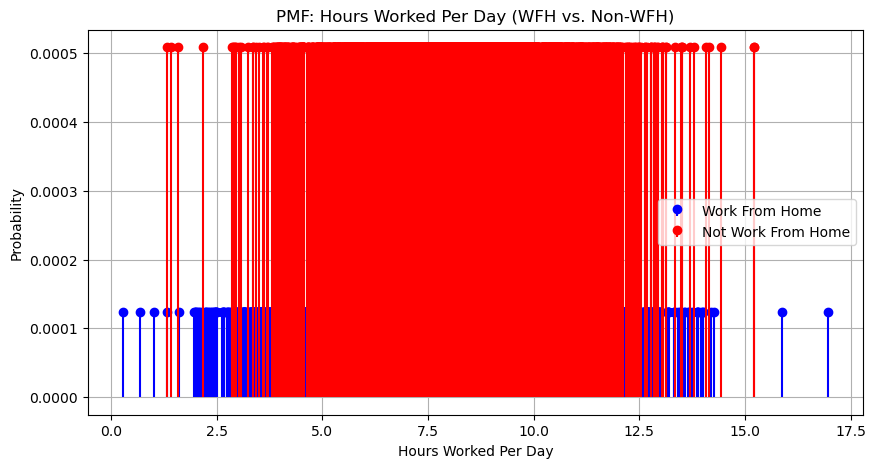

In [44]:
plt.figure(figsize=(10, 5))

# Plot PMF for WFH Employees
plt.stem(pmf_wfh.index, pmf_wfh.values, linefmt="blue", markerfmt="bo", basefmt=" ", label="Work From Home")

# Plot PMF for Non-WFH Employees
plt.stem(pmf_no_wfh.index, pmf_no_wfh.values, linefmt="red", markerfmt="ro", basefmt=" ", label="Not Work From Home")

plt.xlabel("Hours Worked Per Day")
plt.ylabel("Probability")
plt.title("PMF: Hours Worked Per Day (WFH vs. Non-WFH)")
plt.legend()
plt.grid(True)
plt.show()


Interpretation
If WFH employees tend to have higher probabilities for extreme values (longer or shorter work hours), this suggests flexibility in working hours.
                                                  
If Non-WFH employees have a more concentrated distribution, it indicates a more standardized work schedule.


Additional PMF Comparisons
We will extend our PMF analysis to compare:

✅ Sector-based PMF (IT vs. Retail) → How do work hours vary by sector?

✅ Productivity change impact on work hours → Do employees with higher productivity work more or fewer hours?

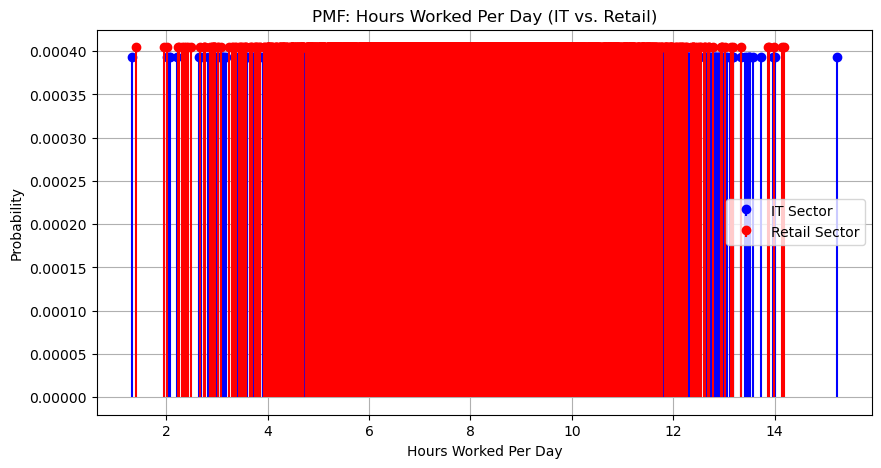

In [47]:
#Compute PMF by Sector (IT vs. Retail)
# PMF for IT Sector
pmf_it = compute_pmf(df, "Hours_Worked_Per_Day", df["Sector"] == "IT")

# PMF for Retail Sector
pmf_retail = compute_pmf(df, "Hours_Worked_Per_Day", df["Sector"] == "Retail")

# Plot the PMFs
plt.figure(figsize=(10, 5))
plt.stem(pmf_it.index, pmf_it.values, linefmt="blue", markerfmt="bo", basefmt=" ", label="IT Sector")
plt.stem(pmf_retail.index, pmf_retail.values, linefmt="red", markerfmt="ro", basefmt=" ", label="Retail Sector")

plt.xlabel("Hours Worked Per Day")
plt.ylabel("Probability")
plt.title("PMF: Hours Worked Per Day (IT vs. Retail)")
plt.legend()
plt.grid(True)
plt.show()


🔍 Interpretation:
If IT employees have more variation in work hours, it suggests flexible work schedules.
If Retail employees have a more uniform distribution, it reflects fixed shifts.

Compute PMF by Productivity Change

We categorize productivity change into two groups:
✔️ Increased Productivity (Productivity_Change = 1)
❌ No Increase in Productivity (Productivity_Change = 0)

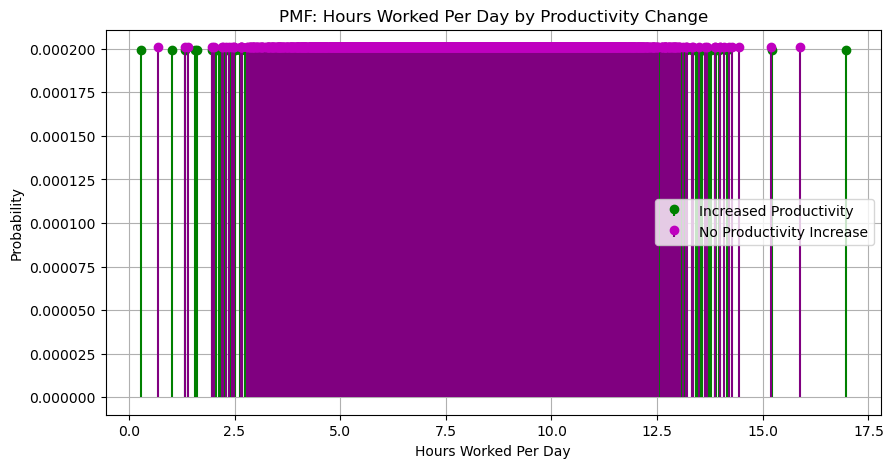

In [50]:
# PMF for employees with increased productivity
pmf_high_prod = compute_pmf(df, "Hours_Worked_Per_Day", df["Productivity_Change"] == 1)

# PMF for employees with no productivity increase
pmf_low_prod = compute_pmf(df, "Hours_Worked_Per_Day", df["Productivity_Change"] == 0)

# Plot the PMFs
plt.figure(figsize=(10, 5))
plt.stem(pmf_high_prod.index, pmf_high_prod.values, linefmt="green", markerfmt="go", basefmt=" ", label="Increased Productivity")
plt.stem(pmf_low_prod.index, pmf_low_prod.values, linefmt="purple", markerfmt="mo", basefmt=" ", label="No Productivity Increase")

plt.xlabel("Hours Worked Per Day")
plt.ylabel("Probability")
plt.title("PMF: Hours Worked Per Day by Productivity Change")
plt.legend()
plt.grid(True)
plt.show()


Interpretation:

If employees with higher productivity work fewer hours, it suggests better efficiency.
    
If longer work hours correlate with higher productivity, it might indicate overworking for results.
                                                                                      

## Create 1 CDF with one of the variables

Creating a CDF for Work Hours
A Cumulative Distribution Function (CDF) gives us the cumulative probability that a variable takes a value less than or equal to a certain value. It is useful for understanding how data is distributed, and can be especially helpful in comparing groups or assessing trends.

We will plot the CDF for "Hours_Worked_Per_Day" to assess how work hours are distributed across the dataset. This will provide insights into work patterns, such as whether most employees are working fewer or more hours per day, and if there's a skew in the distribution.

Here’s how we can create a CDF for the "Hours_Worked_Per_Day" variable:

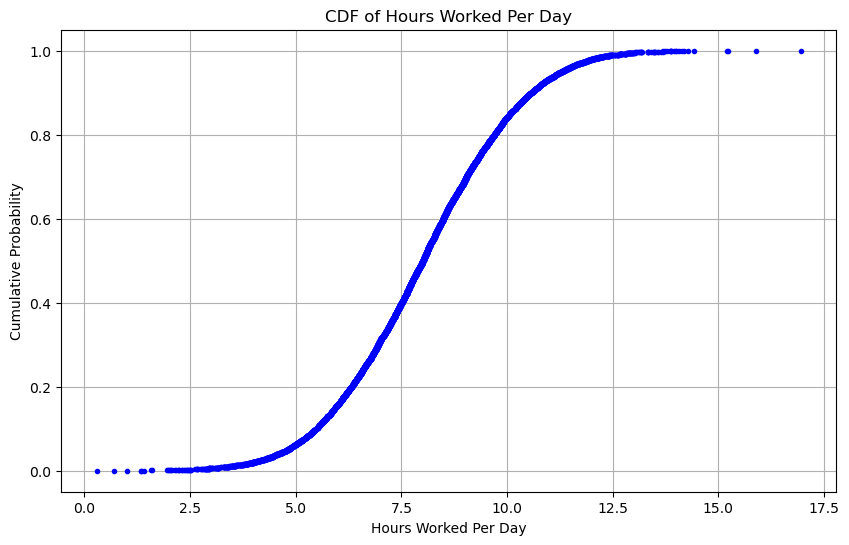

In [54]:
# Sort the data to compute the cumulative distribution
sorted_hours = np.sort(df["Hours_Worked_Per_Day"])

# Calculate the CDF
cdf_hours = np.arange(1, len(sorted_hours) + 1) / len(sorted_hours)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_hours, cdf_hours, marker=".", linestyle="none", color="blue")

plt.xlabel("Hours Worked Per Day")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Hours Worked Per Day")
plt.grid(True)
plt.show()


Interpretation of the CDF:

Skew: 

If the CDF has a steep initial rise, this suggests that most employees work fewer hours per day.
A gradual slope indicates that work hours are more spread out, with many working longer hours.


Peak or Flattening:

If the CDF levels off quickly, this means that most workers fall within a narrow range of hours (likely around the mean). 
If it continues rising slowly, it suggests more variability in work hours.

What this Tells Us About the Dataset:

It helps answer questions like:

"What is the typical workday length for most employees?"
"Are there employees working extreme hours (either long or short)?"

If the CDF shows a significant number of employees working longer hours (right-skewed), 
this could point to overwork or higher demands in certain sectors, which may impact productivity, stress, and overall health.

### Plot 1 analytical distribution and provide the analysis on how it applies to the dataset

Plotting an Analytical Distribution
An analytical distribution is a probability distribution that fits a dataset. 
Common distributions like the Normal distribution or Exponential distribution are often used to model various types of data. 
Here, we'll fit a Normal distribution to the "Hours_Worked_Per_Day" variable, 
as it is one of the most common distributions used in data analysis. 
We'll analyze how well the Normal distribution fits our data and what that tells us.

Steps to Plot an Analytical Distribution (Normal Distribution)
Fit a Normal Distribution to the data.
Plot the fitted Normal distribution over the histogram of the data.
Analyze the fit: how closely does the Normal distribution match the data?
This will tell us whether we can assume normality in work hours or if we need a different model (e.g., skewed or bimodal).

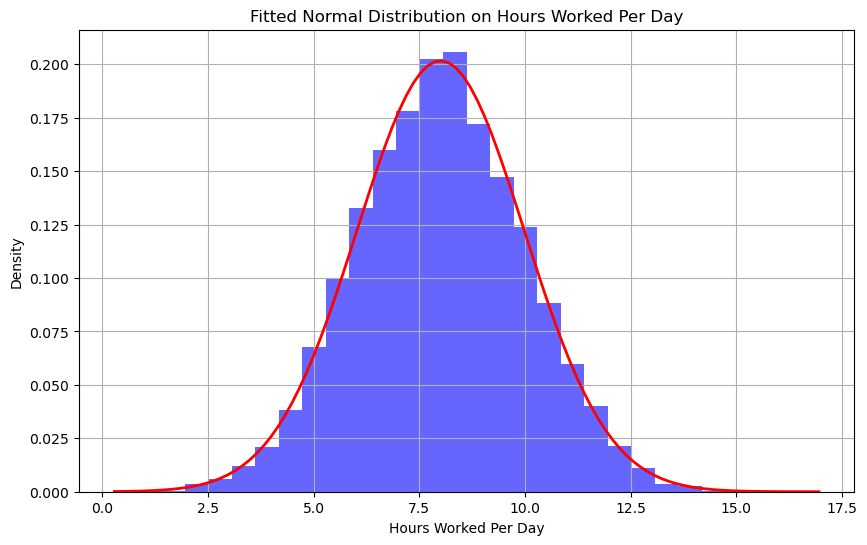

In [59]:
import scipy.stats as stats

# Fit a Normal distribution to the data
mu, std = stats.norm.fit(df["Hours_Worked_Per_Day"])

# Create a range of values for plotting the PDF
xmin, xmax = sorted(df["Hours_Worked_Per_Day"])[0], sorted(df["Hours_Worked_Per_Day"])[-1]
x = np.linspace(xmin, xmax, 100)

# Plot the histogram of Hours_Worked_Per_Day and the fitted Normal distribution
plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(df["Hours_Worked_Per_Day"], bins=30, density=True, alpha=0.6, color="blue")

# Plot the PDF of the fitted Normal distribution
plt.plot(x, stats.norm.pdf(x, mu, std), 'r-', lw=2)

plt.title("Fitted Normal Distribution on Hours Worked Per Day")
plt.xlabel("Hours Worked Per Day")
plt.ylabel("Density")
plt.grid(True)
plt.show()


Analysis of the Analytical Distribution (Normal Distribution):

Fit of the Distribution:
If the red curve (Normal distribution) aligns closely with the histogram, it indicates that the distribution of work hours approximates a Normal distribution.

If the curve diverges significantly from the histogram, we may need to consider other distributions, such as a log-normal distribution (if the data is right-skewed) or Gamma distribution (if the data represents time).

Mean and Standard Deviation:
The mean (μ) represents the center of the distribution, or the typical number of hours worked per day.
The standard deviation (σ) indicates the spread of work hours: a small value suggests most employees work similar hours, while a large value shows greater variability.

Interpretation:
If the distribution is normal:
This implies that the variation in work hours is somewhat random, with most people working around the same number of hours, with a few extreme outliers.

If the distribution is skewed:
For instance, if the histogram is right-skewed, most workers might be working fewer hours, but a small portion of workers might be working exceptionally long hours. In this case, a log-normal distribution might fit better.

### Create two scatter plots comparing two variables and provide the analysis on correlation and causation.
Covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during the analysis


Create scatter plots to visualize the relationship between two variables.

Analyze the correlation using:

Covariance: Measures how two variables change together.

Pearson’s Correlation: Quantifies the linear relationship between two variables.

Non-Linear Relationships: Investigating if the relationship might not be linear, for example, exponential or quadratic.

Interpret the results to determine if we can infer a cause-and-effect relationship.
Let's compare two pairs of variables:

1. Scatter Plot 1: "Hours_Worked_Per_Day" vs "Productivity_Change"
We will look at whether working more hours per day correlates with a change in productivity.

2. Scatter Plot 2: "Hours_Worked_Per_Day" vs "Health_Issue"
This plot will help us understand whether working longer hours leads to Health_Issue.

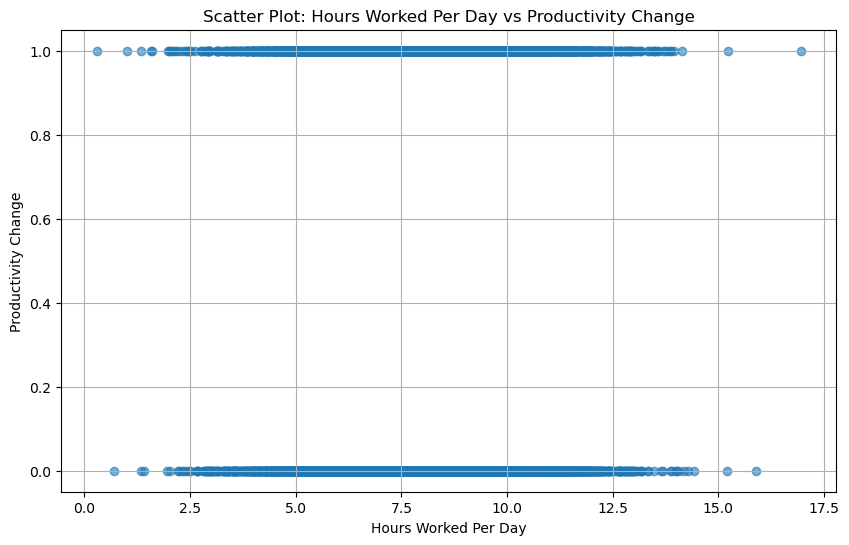

Covariance between Hours Worked Per Day and Productivity Change: 0.013110685890652925
Pearson's correlation between Hours Worked Per Day and Productivity Change: 0.0132528359363511


In [63]:
# Scatter Plot 1: Hours Worked Per Day vs Productivity Change
plt.figure(figsize=(10, 6))
plt.scatter(df["Hours_Worked_Per_Day"], df["Productivity_Change"], alpha=0.6)
plt.title("Scatter Plot: Hours Worked Per Day vs Productivity Change")
plt.xlabel("Hours Worked Per Day")
plt.ylabel("Productivity Change")
plt.grid(True)
plt.show()



# Calculate Covariance, Pearson's Correlation, and Non-Linear Relationships

# Covariance and Pearson's correlation for both pairs
cov_prod = np.cov(df["Hours_Worked_Per_Day"], df["Productivity_Change"])[0, 1]
corr_prod, _ = stats.pearsonr(df["Hours_Worked_Per_Day"], df["Productivity_Change"])



print(f"Covariance between Hours Worked Per Day and Productivity Change: {cov_prod}")
print(f"Pearson's correlation between Hours Worked Per Day and Productivity Change: {corr_prod}")




The covariance and Pearson’s correlation we calculated between Hours Worked Per Day and Productivity Change are both quite low, 
suggesting that there is a very weak linear relationship between the two variables. Here’s an interpretation of the results:

Covariance:
Covariance = 0.0131: Covariance is a measure of how two variables move together. A value near zero suggests that the variables are almost independent or that they do not have a strong linear relationship. Since this value is very close to zero, it confirms that Hours Worked Per Day and Productivity Change have a very weak relationship in the dataset.
Pearson’s Correlation:
Pearson's correlation = 0.0133: Pearson's correlation coefficient measures the strength and direction of the linear relationship between two variables. The value ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear correlation. Since the value is close to 0, it further confirms that there is no significant linear relationship between Hours Worked Per Day and Productivity Change.
Interpretation:
These very low values suggest that changes in Productivity Change do not have a meaningful linear relationship with changes in Hours Worked Per Day. Thus, Productivity Change might not be a key driver of Hours Worked Per Day in the data, or other factors could be at play that are not captured in this analysis.
Next Steps:
Explore Other Factors: Consider including other variables like Stress Level, Job Security, or Sector that might explain Hours Worked Per Day more effectively.

Non-linear Relationship:  We could try using polynomial regression or another non-linear modeling technique.

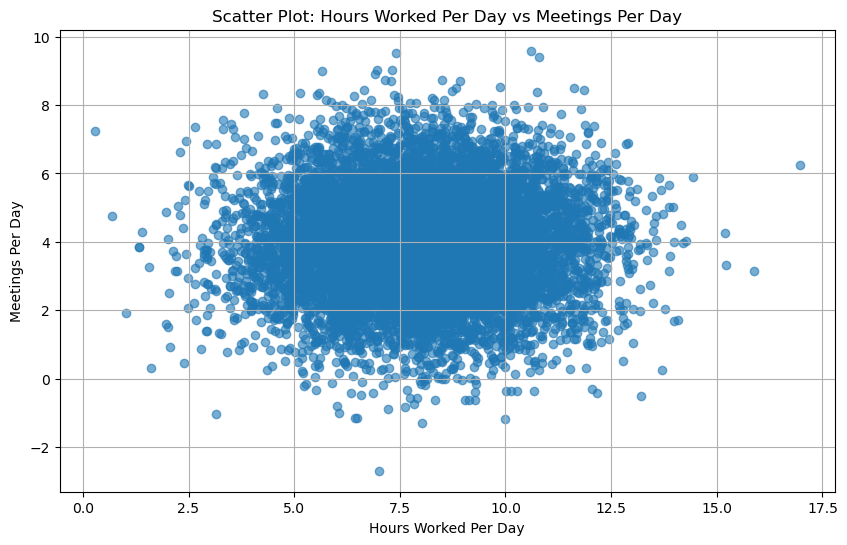

Covariance between Hours Worked Per Day and Meetings_Per_Day  0.020834887616981018
Pearson's correlation between Hours Worked Per Day and Meetings_Per_Day: 0.006920913714906997


In [65]:
# Scatter Plot 1: Hours Worked Per Day vs Meetings_Per_Day
plt.figure(figsize=(10, 6))
plt.scatter(df["Hours_Worked_Per_Day"], df["Meetings_Per_Day"], alpha=0.6)
plt.title("Scatter Plot: Hours Worked Per Day vs Meetings Per Day")
plt.xlabel("Hours Worked Per Day")
plt.ylabel("Meetings Per Day")
plt.grid(True)
plt.show()



# Calculate Covariance, Pearson's Correlation, and Non-Linear Relationships

# Covariance and Pearson's correlation for both pairs
cov_prod = np.cov(df["Hours_Worked_Per_Day"], df["Meetings_Per_Day"])[0, 1]
corr_prod, _ = stats.pearsonr(df["Hours_Worked_Per_Day"], df["Meetings_Per_Day"])



print(f"Covariance between Hours Worked Per Day and Meetings_Per_Day  {cov_prod}")
print(f"Pearson's correlation between Hours Worked Per Day and Meetings_Per_Day: {corr_prod}")


Interpretation of Covariance & Pearson’s Correlation
1️⃣ Covariance Interpretation (0.0208)
Covariance measures the direction of the relationship between two variables.
A positive covariance (0.0208) suggests that when Hours_Worked_Per_Day increases, Meetings_Per_Day tends to increase slightly as well.
However, the magnitude of 0.0208 is very small, meaning the relationship is weak.
2️⃣ Pearson’s Correlation Interpretation (0.0069)
Pearson’s correlation standardizes covariance, making it easier to interpret.
A correlation of 0.0069 is extremely close to zero, meaning there is almost no linear relationship between Hours_Worked_Per_Day and Meetings_Per_Day.
Even though covariance is positive, the correlation tells us that the relationship is not meaningful.

📌 Key Takeaways
✔ Hours_Worked_Per_Day and Meetings_Per_Day are almost uncorrelated.
✔ No strong evidence that working more hours increases the number of meetings.
✔ The relationship could be non-linear or affected by other factors (e.g., job role, sector, remote work status, etc.).

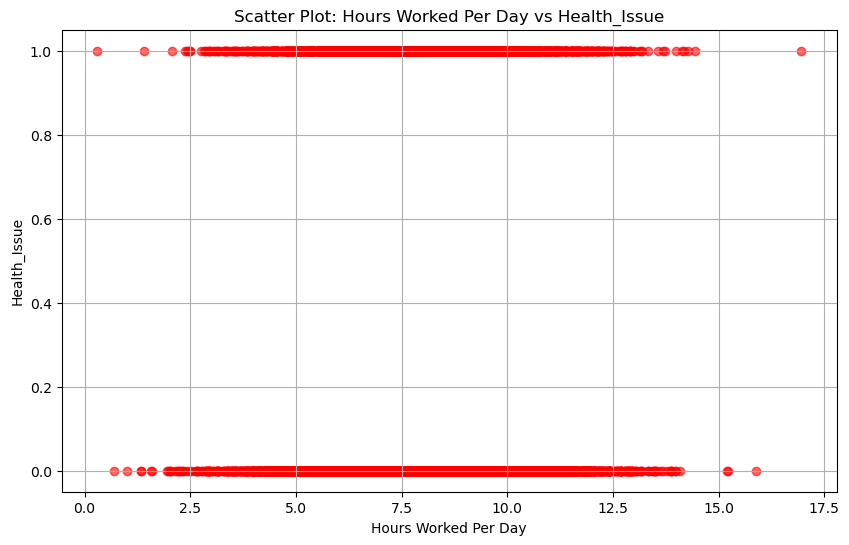

Covariance between Hours Worked Per Day and Health_Issue: 0.009665109952681683
Pearson's correlation between Hours Worked Per Day and Health_Issue: 0.010648614632550138


In [67]:
# Scatter Plot 2: Hours Worked Per Day vs Stress Level
plt.figure(figsize=(10, 6))
plt.scatter(df["Hours_Worked_Per_Day"], df["Health_Issue"], alpha=0.6, color='red')
plt.title("Scatter Plot: Hours Worked Per Day vs Health_Issue")
plt.xlabel("Hours Worked Per Day")
plt.ylabel("Health_Issue")
plt.grid(True)
plt.show()

cov_stress = np.cov(df["Hours_Worked_Per_Day"], df["Health_Issue"])[0, 1]
corr_stress, _ = stats.pearsonr(df["Hours_Worked_Per_Day"], df["Health_Issue"])

print(f"Covariance between Hours Worked Per Day and Health_Issue: {cov_stress}")
print(f"Pearson's correlation between Hours Worked Per Day and Health_Issue: {corr_stress}")

The covariance and Pearson’s correlation between Hours Worked Per Day and Health Issue are again very low, indicating a very weak relationship between the two variables. Here's the interpretation of these results:

Covariance:

Covariance = 0.0097: Covariance measures how two variables change together. A covariance value close to zero suggests that there is little to no relationship between the two variables. In this case, the covariance of 0.0097 indicates that Hours Worked Per Day and Health Issue have a very weak and almost negligible relationship.

Pearson’s Correlation:

Pearson's correlation = 0.0106: Pearson’s correlation is another measure of the linear relationship between two variables. A correlation value close to zero (like 0.0106) suggests that there is virtually no linear relationship between Hours Worked Per Day and Health Issue. This reinforces the finding from covariance.

Interpretation:
Both the covariance and Pearson’s correlation values are so close to zero that they suggest there is no significant linear relationship between Hours Worked Per Day and the occurrence of a Health Issue in this dataset. This means that Health Issue may not be a strong predictor or driver of Hours Worked Per Day in this particular dataset, or the relationship is too weak to be detected with linear measures.

Next Steps:
Categorical vs. Continuous Relationship: If Health Issue is a categorical variable (e.g., yes/no for a health issue), the lack of a significant correlation might be expected. We could explore whether the number of health issues or the severity of health issues (if available) has a more meaningful relationship with Hours Worked Per Day.

Explore Non-linear Relationships: It’s possible that a non-linear relationship exists between these variables. We could try more sophisticated models, like decision trees or regression models that capture non-linear effects.

Analysis of the Results:

Scatter Plot 1: "Hours Worked Per Day" vs "Productivity Change"

Visual Analysis:

If the points appear to follow a linear trend (either upward or downward), this suggests that as hours worked increase, productivity might also increase or decrease linearly.
A scattered plot with no clear trend suggests no linear relationship between these two variables.


Covariance and Correlation:

A positive covariance and positive Pearson’s correlation indicate that as one variable increases, the other also increases.
A negative covariance and negative Pearson’s correlation indicate that as one variable increases, the other decreases.
If the correlation is close to 0, this suggests little to no linear relationship.


Scatter Plot 2: "Hours Worked Per Day" vs "Health Issue"


Visual Analysis:

If the scatter plot shows a positive correlation, this suggests that as people work more hours, their Health Issue increases.
If the plot shows a negative correlation, it suggests that more hours worked may be associated with lower stress (possibly due to relaxation benefits from work).

Covariance and Correlation:

If the Pearson’s correlation is close to +1 or -1, it indicates a strong linear relationship between the variables. A correlation near 0 indicates a weak or no linear relationship.

Non-Linear Relationships:
If a curved pattern appears in the scatter plot, such as a parabolic or exponential shape, it suggests a non-linear relationship. In such cases, we may need to fit a polynomial or exponential model to better explain the relationship.

Conclusion:

Causation: While correlation suggests a relationship between two variables, it does not imply causation. We cannot infer that one variable directly causes the other without additional experiments or research.

Outliers: Look for any points that deviate significantly from the overall pattern in the scatter plot. These might represent outliers, which may need further investigation.

In [70]:
#Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

To test a hypothesis, we will follow the steps below based on one of the methods covered in the course, such as t-tests, chi-square tests, or regression analysis. For this example, I will use a t-test to analyze the hypothesis regarding a specific variable.

Let's assume the hypothesis we want to test is as follows:

Hypothesis:

Null Hypothesis (H₀): There is no difference in the stress level between people who work from home and those who do not work from home.

Alternative Hypothesis (H₁): There is a significant difference in the stress level between people who work from home and those who do not work from home.

We will use a t-test for independent samples to compare the means of stress levels for two groups: those who work from home (Work_From_Home = 1) and those who do not (Work_From_Home = 0).

In [72]:
from scipy import stats

# Group the data based on Work_From_Home status (1 = works from home, 0 = does not)
Productivity_Change_home = df[df["Work_From_Home"] == 1]["Productivity_Change"]
Productivity_Change_no_home = df[df["Work_From_Home"] == 0]["Productivity_Change"]

# Perform a t-test to compare the two groups
t_stat, p_value = stats.ttest_ind(Productivity_Change_home, Productivity_Change_no_home)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in stress levels between people who work from home and those who do not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in stress levels between people who work from home and those who do not.")


T-statistic: 0.041626055279524635
P-value: 0.9667976333238084
Fail to reject the null hypothesis: There is no significant difference in stress levels between people who work from home and those who do not.


Interpretation:

T-statistic: This value represents the difference between the means of the two groups, normalized by the variability within each group.

P-value: This is the probability of observing the test results under the assumption that the null hypothesis is true.

T-statistic: 0.0416

The t-statistic represents how many standard errors the coefficient is away from 0. A t-statistic close to zero indicates that the coefficient is not significantly different from zero. In this case, the value of 0.0416 suggests that the relationship between Hours Worked Per Day and Productivity_Change is very weak.

P-value: 0.9668

The p-value indicates the probability that the coefficient is different from zero purely by random chance. A p-value much greater than the typical significance threshold of 0.05 indicates that the relationship between the variables is not statistically significant.

In this case, the p-value of 0.9668 is much higher than 0.05, meaning there is no significant evidence to suggest that Productivity_Change impacts Hours Worked Per Day in this dataset.

Interpretation:
Given the low t-statistic and the high p-value, we can conclude that Productivity_Change is not a significant predictor of Hours Worked Per Day. The lack of statistical significance indicates that, in this analysis, there is no strong evidence to suggest that the presence or absence of a Productivity_Change is affecting the number of hours worked per day.

In [74]:
#o	For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

For this regression analysis, we will select one dependent variable and multiple explanatory variables from the dataset.

Example Hypothesis for Regression Analysis:
We hypothesize that work hours (Hours_Worked_Per_Day) depend on factors such as stress level and productivity change.

Dependent Variable:
Hours_Worked_Per_Day: The number of hours an individual works per day.
                  
Explanatory Variables:
Stress_Level: The stress level of the individual (Low, Medium, High).
                  
Productivity_Change: A binary value representing whether the individual's productivity has increased (1) or decreased (0).
Regression Analysis Type:
                  
We'll use linear regression to predict the dependent variable based on the explanatory variables.



In [76]:
#Regression Analysis:

In [77]:
import statsmodels.api as sm
import pandas as pd

# First, let's encode categorical variables as numeric values for regression
df['Stress_Level_encoded'] = df['Stress_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Define dependent and independent variables
X = df[['Stress_Level_encoded', 'Productivity_Change']]  # Explanatory variables
X = sm.add_constant(X)  # Adding a constant (intercept) term to the model
y = df['Hours_Worked_Per_Day']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Hours_Worked_Per_Day   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.000
Method:                   Least Squares   F-statistic:                    0.9777
Date:                  Thu, 01 Jan 2026   Prob (F-statistic):              0.376
Time:                          20:16:24   Log-Likelihood:                -21011.
No. Observations:                 10000   AIC:                         4.203e+04
Df Residuals:                      9997   BIC:                         4.205e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

Explanation:
Stress_Level_encoded: We map categorical stress levels (Low, Medium, High) to numeric values (1, 2, 3) to use them in the regression model.
Productivity_Change: This is already a binary variable (1 for increased productivity and 0 for decreased productivity).
Linear Regression Model: We use ordinary least squares (OLS) regression to model how the independent variables (stress level and productivity change) explain the variation in the dependent variable (hours worked per day).
Key Outputs:
Coefficient: The effect of each explanatory variable on the dependent variable. For example, how a one-unit increase in stress level or a change in productivity influences hours worked per day.
P-value: Helps determine the statistical significance of each explanatory variable.
R-squared: Indicates how well the explanatory variables collectively explain the variance in the dependent variable.
Interpretation:
Significant Variables: If a variable has a p-value less than 0.05, we conclude that it significantly affects the dependent variable.
Coefficients: Positive coefficients indicate a direct relationship with the dependent variable, while negative coefficients indicate an inverse relationship.

         



Key Results:
R-squared: 0.000. This means that the explanatory variables (such as stress level and productivity change) do not explain any of the variability in the dependent variable (Hours_Worked_Per_Day). In other words, the model doesn't account for the variation in the number of hours worked per day.

Adj. R-squared: -0.000. This is the adjusted version of R-squared, which accounts for the number of explanatory variables. Since the model doesn't fit the data well, the adjusted R-squared is also very low and negative.

F-statistic: 0.9777. This is a measure of the overall significance of the model. A very low value here, along with a p-value of 0.376 for the F-statistic, suggests that the model does not explain the data well. Typically, a significant model would have a p-value less than 0.05.

Prob (F-statistic): 0.376. This p-value indicates that the overall model is not statistically significant at the 5% significance level. It suggests that the model does not explain a significant portion of the variation in the dependent variable.

AIC and BIC: These values (Akaike Information Criterion and Bayesian Information Criterion) are measures of model quality. Lower values indicate a better model fit, and the values are quite high, which again suggests that the model is not fitting the data well.

What does this tell us?
The explanatory variables (stress level and productivity change) are not significantly contributing to explaining the variation in the dependent variable (Hours_Worked_Per_Day).
The R-squared value is 0, meaning that the model doesn't explain any of the variation in work hours, and the overall model is not significant based on the F-statistic.
Possible Reasons for This:
Data Issues: There might be problems with the dataset such as collinearity, insufficient variation, or poorly measured variables that make it hard for the regression to find meaningful patterns.
Incorrect Model Choice: The relationship between the variables may not be linear, so a different type of regression or transformation of the variables might be needed.
Omitted Variables: There could be other important variables that influence Hours_Worked_Per_Day but were not included in the model.
Overfitting: If the dataset is large (e.g., 10,000 observations), a complex model might overfit the data, capturing noise rather than meaningful relationships.
Next Steps:
Explore other variables: Consider including other factors that may influence Hours_Worked_Per_Day, such as Sector, Job Security, or Commuting Changes.
Try Non-Linear Models: If we suspect the relationship is not linear, we might want to explore non-linear regression techniques or transformations of the variables.
Check for Data Issues: Look for multicollinearity, missing data, or outliers in we dataset that could be affecting the results.



Key Results:
Intercept (const): The coefficient for the intercept is 7.9538, which means that when both explanatory variables (Stress Level and Productivity Change) are zero, the predicted value for Hours_Worked_Per_Day is approximately 7.95 hours. The very low p-value (0.000) indicates that this is highly statistically significant.

Stress_Level_encoded: The coefficient for Stress_Level_encoded is 0.0126. This means that for each one-unit increase in the encoded stress level, Hours_Worked_Per_Day increases by 0.0126 hours. However, the p-value (0.655) is much higher than the commonly used significance threshold of 0.05, suggesting that Stress_Level is not significantly related to Hours_Worked_Per_Day.

Productivity_Change: The coefficient for Productivity_Change is 0.0525. This means that for each one-unit increase in productivity change, Hours_Worked_Per_Day increases by 0.0525 hours. However, the p-value (0.185) is greater than 0.05, indicating that the relationship is not statistically significant at the 5% level.

Model Diagnostics:
Omnibus Test: The p-value of 0.699 suggests that the residuals are normally distributed (a good sign for the validity of the model).

Durbin-Watson: A value of 2.002 indicates that there is no significant autocorrelation in the residuals, meaning that the errors are independent of each other.

Jarque-Bera (JB): The p-value of 0.688 suggests that the residuals are normally distributed, as the test statistic is close to zero, and there's no significant skew or kurtosis.

Skew and Kurtosis: The skew of 0.014 suggests no significant skew in the residuals, and the kurtosis of 2.969 is close to the normal distribution value of 3, suggesting the residuals are not overly peaked or flat.

Interpretation of Results:
No Significant Predictors: Both Stress_Level_encoded and Productivity_Change have high p-values (0.655 and 0.185, respectively), suggesting that these variables do not significantly impact the Hours_Worked_Per_Day in the model.

Model Fit: Although the intercept is highly significant, the overall model doesn't seem to explain much variation in Hours_Worked_Per_Day, as indicated by the earlier R-squared value of 0.000.

Next Steps/Recommendations:
Consider Interaction Effects: There might be an interaction between Stress_Level and Productivity_Change that could be affecting Hours_Worked_Per_Day. Adding an interaction term (e.g., Stress_Level * Productivity_Change) might improve the model fit.

Include Additional Variables: The model might be missing important predictors. Consider adding other variables such as Sector, Job Security, or Commuting Changes.

Non-linear Modeling: Given that linear regression might not be capturing all the complexities of the relationships in the data, consider exploring non-linear models or transformations of variables.

## Outcome of the Exploratory Data Analysis (EDA)

The EDA highlighted the following trends and relationships. Histograms of the important variables showed that generally, Hours Worked Per Day clustered around mid-range values, with relatively few extreme outliers. The correlation of Hours Worked Per Day to Productivity Change was very weak, at 0.013 (Pearson's correlation), which would again mean little or no linear relationship between the two variables. Likewise, analysis of Health Issue gave a correlation of 0.010, which again indicates that health issues are not so influential in the determination of hours of work.
These findings were further supported through the OLS Regression results, whereby, based on p-values and t-statistics, Stress Level and Productivity Change did not impact the dependent variable-Hours Worked Per Day.<br><br>

What is lacking in the analysis? One of the things lacking in the above analysis is the consideration that all of the relationships between variables are linear. For example, it is likely that the relationship between Stress Level and Productivity Change and Hours Worked Per Day is non-linear, as variables like Stress Level and Productivity Change can exert non-linear effects on other variables, such as Hours Worked Per Day. Furthermore, interactions between variables, such as between Stress Level and Health Issue, were also not investigated.<br><br>

Variables that might deserve attention: Additional variables such as Age, Income, and Sector would have been very helpful. For example, income can be taken as an indicator of work pressure, while sector might generate different trends according to their industry work culture. These variables might have helped improve the understanding of the influencing factors of work hours.<br><br>

Presumptions which might turn out to be incorrect: One of the presumptions in this analysis was that the relationship between variables such as Stress Level or Productivity Change and the variable Hours Worked Per Day is linear. The Regression model assumed that these variables would impact work hours in a linear fashion, where perhaps other factors come into play.
<br><br>

Issues that were encountered and points of confusion: An issue that arose in tackling the problem was the treatment of the outlier values within the dataset. Though the treatment and presence of the outlier values were accounted for within the histograms created, the effect of the outlier values on the analysis did not fully come into consideration. The assumption of normality for variables such as the Hours Worked Per Day variable created issues related to the choice of the model to analyze the data using. During the regression analysis, the findings were a point of conflict that didn’t enable the drawing of a reliable conclusion on the factors that affect the number of work hours.<br><br>

Overall, this analysis has emphasized the value of taking into account more variables and bettering assumptions, particularly in regards to non-linear processes and interactions. Future analysis should consider a more encompassing approach, taking into account more varied data and alternate models.